# Example: Calculating Seasonal Variations

This file demonstrates how to use MUTE to plot the seasonal variation in the total muon flux over the course of a year both at the surface and underground.

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as scii

import mute.constants as mtc
import mute.surface as mts
import mute.underground as mtu

## Set the Constants

In [2]:
mtc.set_verbose(1)
mtc.set_output(True)
mtc.set_lab("Example")
mtc.set_overburden("flat")
mtc.set_vertical_depth(1)
mtc.set_medium("rock")
mtc.set_density(2.65)
mtc.set_n_muon(100000)

## Calculate the Fluxes

In order to calculate the seasonal variation, both the location and the month have to be set by specifying the arguments in the ``mts.calc_s_fluxes()`` function. Start by defining empty lists that will hold the total fluxes at the surface and underground for each of the 12 months. Then loop over all of the months and fill the lists.

In [3]:
all_s_tot_fluxes = []
all_u_tot_fluxes = []

for m in range(len(mtc.MONTHS)):
    
    print(f"Calculating surface fluxes for {mtc.MONTHS[m]}.")
    
    # Calculate surface flux matrices at Gran Sasso for each month
    # Then use them to calculate the total surface and underground fluxes
    
    s_fluxes   = mts.calc_s_fluxes(atmosphere = "MSIS00", location = "SanGrasso", month = mtc.MONTHS[m], force = True)
    s_tot_flux = mts.calc_s_tot_flux(s_fluxes = s_fluxes)
    u_tot_flux = mtu.calc_u_tot_flux(s_fluxes = s_fluxes)
    
    # Fill empty lists
    
    all_s_tot_fluxes.append(s_tot_flux)
    all_u_tot_fluxes.append(u_tot_flux)

Calculating surface fluxes for January.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:45<00:00,  5.30s/it]


Calculating surface fluxes for February.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:45<00:00,  5.25s/it]


Calculating surface fluxes for March.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:43<00:00,  5.19s/it]


Calculating surface fluxes for April.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:43<00:00,  5.17s/it]


Calculating surface fluxes for May.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:43<00:00,  5.17s/it]


Calculating surface fluxes for June.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:43<00:00,  5.17s/it]


Calculating surface fluxes for July.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:43<00:00,  5.16s/it]


Calculating surface fluxes for August.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:42<00:00,  5.15s/it]


Calculating surface fluxes for September.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:43<00:00,  5.17s/it]


Calculating surface fluxes for October.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:44<00:00,  5.21s/it]


Calculating surface fluxes for November.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:45<00:00,  5.28s/it]


Calculating surface fluxes for December.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:46<00:00,  5.30s/it]


## Plot the Results

Plot the ratio of the total fluxes to their means so that the shapes of the surface and underground variations can be compared to each other.

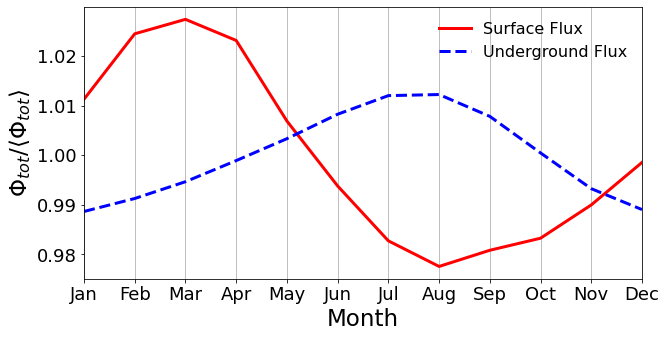

In [9]:
fig = plt.figure(figsize = (10, 5))
ax  = fig.add_subplot(111)

ax.plot(all_s_fluxes/np.mean(all_s_fluxes), color = "red", lw = 3, ls = "-", label = "Surface Flux")
ax.plot(all_u_fluxes/np.mean(all_u_fluxes), color = "blue", lw = 3, ls = "--", label = "Underground Flux")

ax.set_xlabel("Month", fontsize = 23)
ax.set_ylabel(r"$\Phi_{tot}/\langle\Phi_{tot}\rangle$", fontsize = 23)
ax.tick_params(axis = "both", which = "major", labelsize = 18)
ax.set_xlim([0, 11])
ax.set_xticks(np.linspace(0, 11, 12), labels = mtc.MONTHS_SNAMES)
ax.grid(axis = "x")
plt.legend(frameon = False, fontsize = 16)

plt.show()